In [36]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support


# py -m pip install matplotlib

In [2]:
df_private_MTPL = pd.read_csv('df_private_mtpl.txt', sep="\t")

In [ ]:
df_private_MTPL.head(5)

In [3]:
df_private_MTPL['Vehicle_age'] = pd.to_numeric(df_private_MTPL['Vehicle_age'], errors='coerce')
df_private_MTPL['GWP'] = pd.to_numeric(df_private_MTPL['GWP'], errors='coerce')
df_private_MTPL['number_of_claims'] = pd.to_numeric(df_private_MTPL['number_of_claims'], errors='coerce')
df_private_MTPL['Client_Age'] = pd.to_numeric(df_private_MTPL['Client_Age'], errors='coerce')
df_private_MTPL['Policy_Duration'] = pd.to_numeric(df_private_MTPL['Policy_Duration'], errors='coerce')
df_private_MTPL['Years_of_driving'] = pd.to_numeric(df_private_MTPL['Years_of_driving'], errors='coerce')

df_private_MTPL['Duration'] = pd.Categorical(df_private_MTPL['Duration'])
df_private_MTPL['vehicle_type'] = pd.Categorical(df_private_MTPL['vehicle_type'])
df_private_MTPL['Make'] = pd.Categorical(df_private_MTPL['Make'])
df_private_MTPL['vehicle_type_group_mapped'] = pd.Categorical(df_private_MTPL['vehicle_type_group_mapped'])
df_private_MTPL['City'] = pd.Categorical(df_private_MTPL['City'])
df_private_MTPL['Churn'] = pd.Categorical(df_private_MTPL['Churn'])
df_private_MTPL['Renewal'] = pd.Categorical(df_private_MTPL['Renewal'])
df_private_MTPL['Gender'] = pd.Categorical(df_private_MTPL['Gender'])


In [4]:
df_private_MTPL2 = df_private_MTPL

numerical_columns = ['Vehicle_age', 'GWP', 'number_of_claims', 'Policy_Duration', 'Client_Age', 'Years_of_driving']

scaler = MinMaxScaler()
df_private_MTPL2[numerical_columns] = scaler.fit_transform(df_private_MTPL2[numerical_columns])

In [5]:
df_private_MTPL3 = df_private_MTPL2

categorical_columns = ['Duration', 'vehicle_type', 'Make', 'vehicle_type_group_mapped', 'Renewal', 'Gender', 'City']

df_private_MTPL3 = pd.get_dummies(df_private_MTPL3, columns=categorical_columns)

In [6]:
subset_percentage = 0.1  

subset_size = int(len(df_private_MTPL3) * subset_percentage)

subset_indices = np.random.choice(len(df_private_MTPL3), size=subset_size, replace=False)

data1_subset = df_private_MTPL3.iloc[subset_indices]


In [13]:
X = df_private_MTPL3.drop(columns=['Churn']) 
y = df_private_MTPL3['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.90, random_state=42)

In [9]:
# Output the count of each class in y_train
class_counts = y_train.value_counts()

print("Class Counts in y_train:")
print(class_counts)


Class Counts in y_train:
Churn
0    230239
1     17737
Name: count, dtype: int64


In [11]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

class_counts_resampled = pd.Series(y_train_ros).value_counts()

print("Class Counts after RandomOverSampler:")
print(class_counts_resampled)


Class Counts after RandomOverSampler:
Churn
0    230239
1    230239
Name: count, dtype: int64


In [42]:
auc_scorer = make_scorer(roc_auc_score)

param_dist = {
    'n_estimators': randint(1, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, scoring=auc_scorer, random_state=42,verbose=2)

random_search.fit(X_train_ros, y_train_ros)

print("Best Parameters found:")
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=122; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=122; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=122; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=122; total time=   5.7s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=122; total time=   4.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=  20.2s
[CV] END boo

Accuracy: 0.9665010538374744
F1: 0.7224638965785275
AUC: 0.9121621757278331


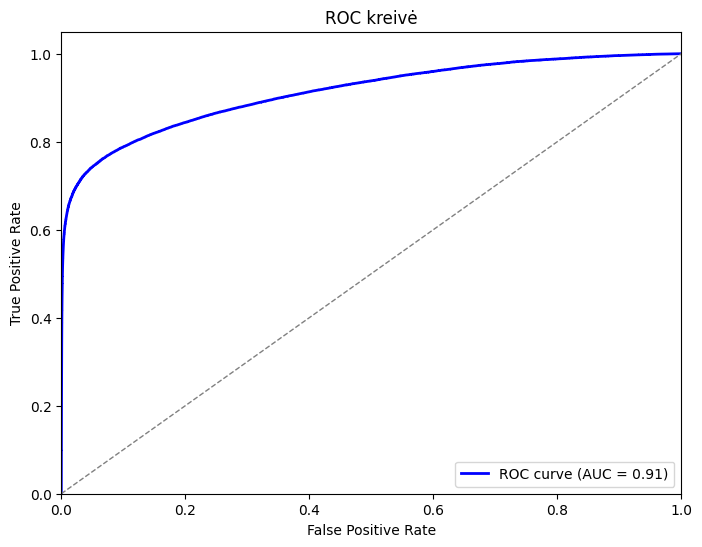

In [67]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='log_loss',
    max_depth=60,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=9,
    n_estimators=158,
    random_state=42
)

best_model.fit(X__train_ros, y__train_ros)

y_pred_ros = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ros)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred_ros)
print("F1:", f1)

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [14]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

class_counts_resampled = pd.Series(y_train_sm).value_counts()

print("Class Counts after SMOTE:")
print(class_counts_resampled)

Class Counts after SMOTE:
Churn
0    115119
1    115119
Name: count, dtype: int64


In [16]:
from sklearn.metrics import f1_score
f1_scorer = make_scorer(f1_score)



param_dist = {
    'n_estimators': randint(1, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, scoring=auc_scorer, random_state=42)

model_SMOTE = random_search.fit(X_train_sm, y_train_sm)

print("Best Parameters found:")
print(random_search.best_params_)

Best Parameters found:
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 158}


Accuracy: 0.9649123750327092
F1: 0.7459610967649845
AUC: 0.930248442654385


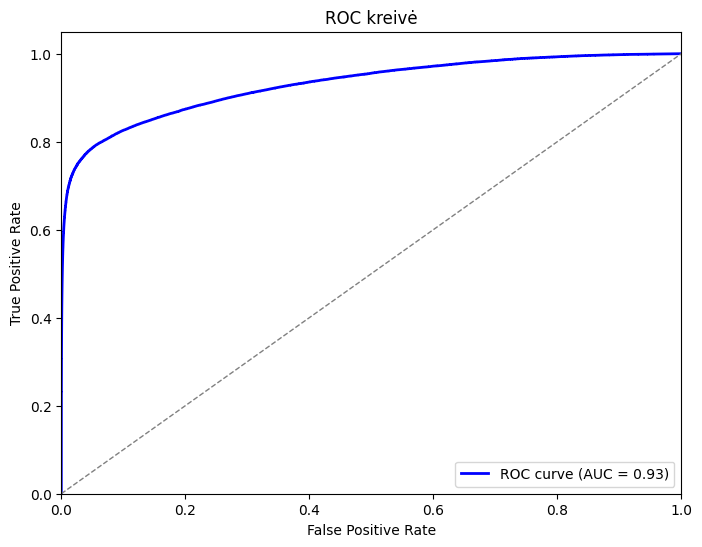

In [17]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='log_loss',
    max_depth=60,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=9,
    n_estimators=158,
    random_state=42
)

best_model.fit(X_train_sm, y_train_sm)

y_pred_sm = best_model.predict(X_test)

accuracy_sm = accuracy_score(y_test, y_pred_sm)
print("Accuracy:", accuracy_sm)

f1_sm = f1_score(y_test, y_pred_sm)
print("F1:", f1_sm)

y_prob_sm = best_model.predict_proba(X_test)[:, 1]
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_test, y_prob_sm)
auc_score_sm = auc(fpr_sm, tpr_sm)
print("AUC:", auc_score_sm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sm, tpr_sm, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_sm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [52]:
enn = EditedNearestNeighbours()
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

class_counts_resampled = pd.Series(y_train_enn).value_counts()

print("Class Counts after SMOTE:")
print(class_counts_resampled)

Class Counts after SMOTE:
Churn
0    19294
1     1774
Name: count, dtype: int64


In [53]:
param_dist = {
    'n_estimators': randint(1, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, scoring=auc_scorer, random_state=42)

model_SMOTE = random_search.fit(X_train_enn, y_train_enn)

print("Best Parameters found:")
print(random_search.best_params_)

Best Parameters found:
{'bootstrap': True, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 55}


Accuracy: 0.9688712622923702
F1: 0.744708423326134
AUC: 0.9137558407744364


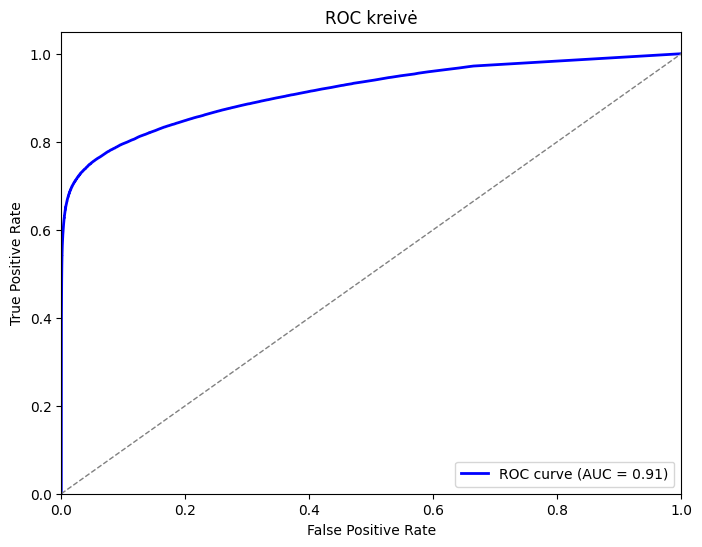

In [78]:

best_model = RandomForestClassifier(
    bootstrap=True,
    criterion='log_loss',
    max_depth=None,
    max_features=None,
    min_samples_leaf=3,
    min_samples_split=5,
    n_estimators=55,
    random_state=42
)

best_model.fit(X_train_enn, y_train_enn)

y_pred_enn = best_model.predict(X_test)

accuracy_enn = accuracy_score(y_test, y_pred_enn)
print("Accuracy:", accuracy_enn)

f1_enn = f1_score(y_test, y_pred_enn)
print("F1:", f1_enn)

y_prob_enn = best_model.predict_proba(X_test)[:, 1]
fpr_enn, tpr_enn, thresholds_enn = roc_curve(y_test, y_prob_enn)
auc_score_enn = auc(fpr_enn, tpr_enn)
print("AUC:", auc_score_enn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_enn, tpr_enn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_enn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [55]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

class_counts_resampled = pd.Series(y_train_enn).value_counts()

print("Class Counts after SMOTE:")
print(class_counts_resampled)

Class Counts after SMOTE:
Churn
0    19294
1     1774
Name: count, dtype: int64


In [56]:
param_dist = {
    'n_estimators': randint(1, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, scoring=auc_scorer, random_state=42)

model_SMOTE = random_search.fit(X_train_tl, y_train_tl)

print("Best Parameters found:")
print(random_search.best_params_)

Best Parameters found:
{'bootstrap': True, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 55}


Accuracy: 0.9689963566274896
F1: 0.743252821547353
AUC: 0.9110825082524867


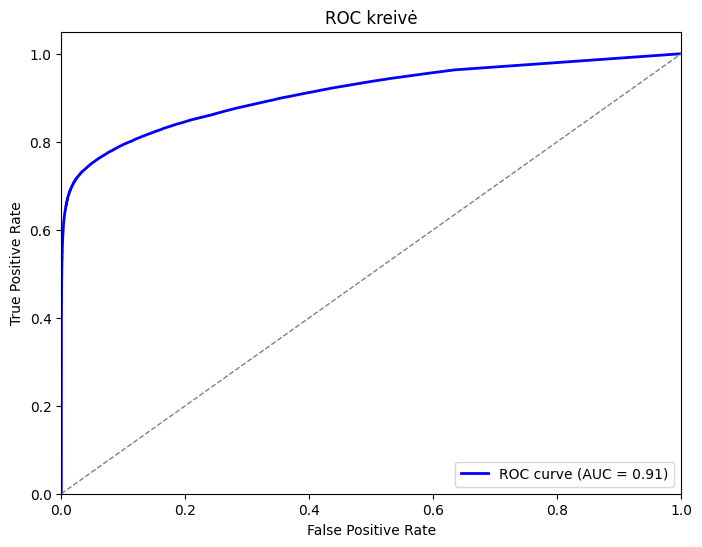

In [81]:

best_model = RandomForestClassifier(
    bootstrap=True,
    criterion='log_loss',
    max_depth=None,
    max_features=None,
    min_samples_leaf=3,
    min_samples_split=5,
    n_estimators=55,
    random_state=42
)

best_model.fit(X_train_tl, y_train_tl)

y_pred_tl = best_model.predict(X_test)

accuracy_tl = accuracy_score(y_test, y_pred_tl)
print("Accuracy:", accuracy_tl)

f1_tl = f1_score(y_test, y_pred_tl)
print("F1:", f1_tl)

y_prob_tl = best_model.predict_proba(X_test)[:, 1]
fpr_tl, tpr_tl, thresholds_tl = roc_curve(y_test, y_prob_tl)
auc_score_tl = auc(fpr_tl, tpr_tl)
print("AUC:", auc_score_tl)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tl, tpr_tl, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_tl)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [58]:
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

class_counts_resampled = pd.Series(y_train_enn).value_counts()

print("Class Counts after SMOTE:")
print(class_counts_resampled)

Class Counts after SMOTE:
Churn
0    19294
1     1774
Name: count, dtype: int64


In [59]:
param_dist = {
    'n_estimators': randint(1, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, scoring=auc_scorer, random_state=42)

random_search.fit(X_train_ada, y_train_ada)

print("Best Parameters found:")
print(random_search.best_params_)

Best Parameters found:
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 158}


Accuracy: 0.9619079519670672
F1: 0.7132368885722251
AUC: 0.9150507700260757


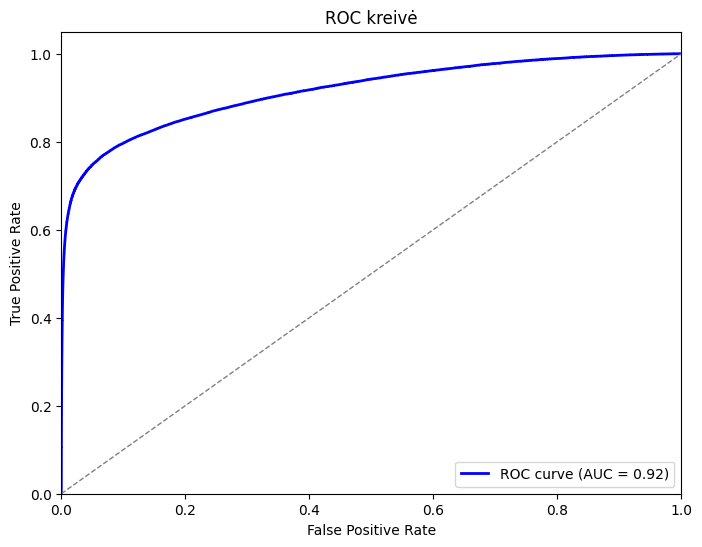

In [82]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='log_loss',
    max_depth=60,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=9,
    n_estimators=158,
    random_state=42
)

best_model.fit(X_train_ada, y_train_ada)

y_pred_ada = best_model.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", accuracy_ada)

f1_ada = f1_score(y_test, y_pred_ada)
print("F1:", f1_ada)

y_prob_ada = best_model.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_prob_ada)
auc_score_ada = auc(fpr_ada, tpr_ada)
print("AUC:", auc_score_ada)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_ada)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [61]:
sme = SMOTEENN(random_state=42)
X_train_sme, y_train_sme = sme.fit_resample(X_train, y_train)

class_counts_resampled = pd.Series(y_train_enn).value_counts()

print("Class Counts after SMOTE:")
print(class_counts_resampled)

Class Counts after SMOTE:
Churn
0    19294
1     1774
Name: count, dtype: int64


In [62]:
param_dist = {
    'n_estimators': randint(1, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, scoring=auc_scorer, random_state=42)

random_search.fit(X_train_sme, y_train_sme)

print("Best Parameters found:")
print(random_search.best_params_)

Best Parameters found:
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 158}


Accuracy: 0.9399028708326921
F1: 0.6235597964770109
AUC: 0.9084953406977236


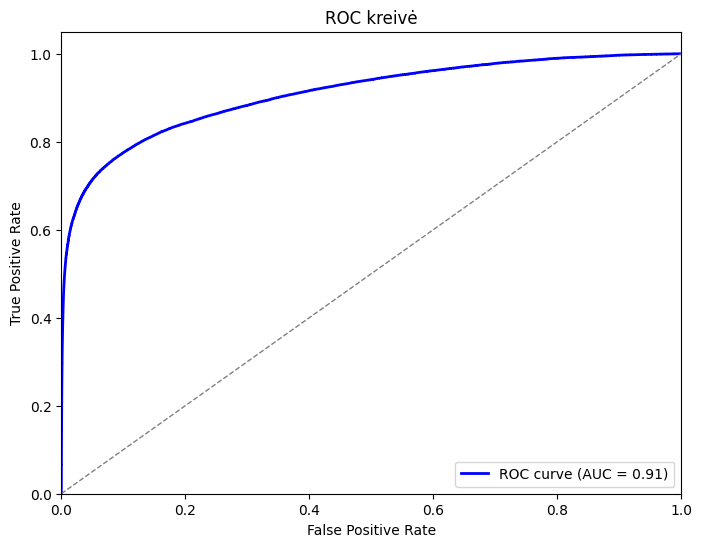

In [83]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='log_loss',
    max_depth=60,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=9,
    n_estimators=158,
    random_state=42
)

best_model.fit(X_train_sme, y_train_sme)

y_pred_sme = best_model.predict(X_test)

accuracy_sme = accuracy_score(y_test, y_pred_sme)
print("Accuracy:", accuracy_sme)

f1_sme = f1_score(y_test, y_pred_sme)
print("F1:", f1_sme)

y_prob_sme = best_model.predict_proba(X_test)[:, 1]
fpr_sme, tpr_sme, thresholds_sme = roc_curve(y_test, y_prob_sme)
auc_score_sme = auc(fpr_sme, tpr_sme)
print("AUC:", auc_score_sme)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sme, tpr_sme, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_sme)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [64]:
smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

class_counts_resampled = pd.Series(y_train_enn).value_counts()

print("Class Counts after SMOTE:")
print(class_counts_resampled)

Class Counts after SMOTE:
Churn
0    19294
1     1774
Name: count, dtype: int64


In [65]:
param_dist = {
    'n_estimators': randint(1, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, scoring=auc_scorer, random_state=42)

random_search.fit(X_train_smt, y_train_smt)

print("Best Parameters found:")
print(random_search.best_params_)

Best Parameters found:
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 158}


Accuracy: 0.9620733727654819
F1: 0.7115567572980822
AUC: 0.9145558185679983


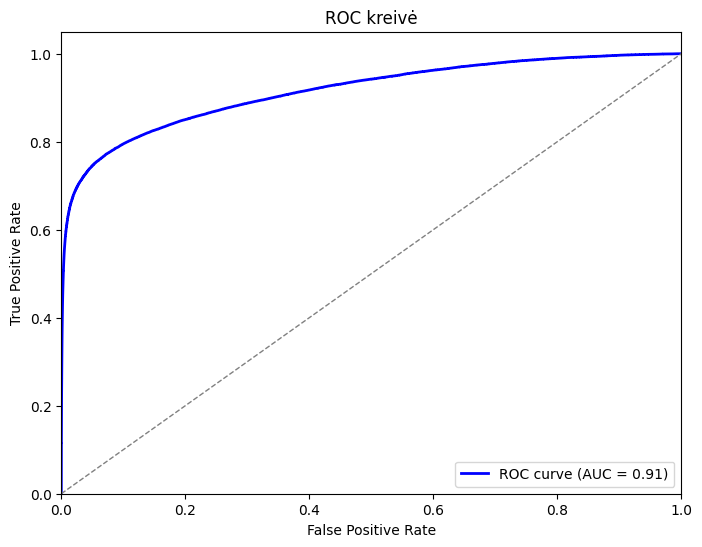

In [84]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='log_loss',
    max_depth=60,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=9,
    n_estimators=158,
    random_state=42
)

best_model.fit(X_train_smt, y_train_smt)

y_pred_smt = best_model.predict(X_test)

accuracy_smt = accuracy_score(y_test, y_pred_smt)
print("Accuracy:", accuracy_smt)

f1_smt = f1_score(y_test, y_pred_smt)
print("F1:", f1_smt)

y_prob_smt = best_model.predict_proba(X_test)[:, 1]
fpr_smt, tpr_smt, thresholds_smt = roc_curve(y_test, y_prob_smt)
auc_score_smt = auc(fpr_smt, tpr_smt)
print("AUC:", auc_score_smt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smt, tpr_smt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_smt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

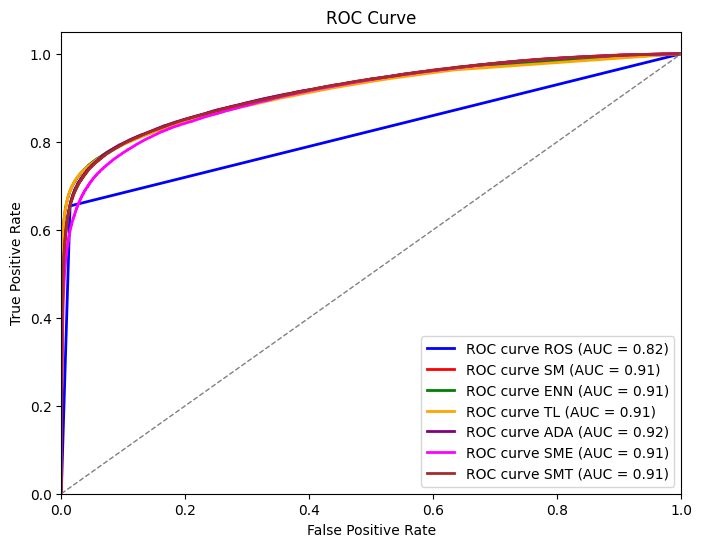

In [85]:
plt.figure(figsize=(8, 6))


plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve ROS (AUC = %0.2f)' % auc_score)
plt.plot(fpr_sm, tpr_sm, color='red', lw=2, label='ROC curve SM (AUC = %0.2f)' % auc_score_sm)
plt.plot(fpr_enn, tpr_enn, color='green', lw=2, label='ROC curve ENN (AUC = %0.2f)' % auc_score_enn)
plt.plot(fpr_tl, tpr_tl, color='orange', lw=2, label='ROC curve TL (AUC = %0.2f)' % auc_score_tl)
plt.plot(fpr_ada, tpr_ada, color='purple', lw=2, label='ROC curve ADA (AUC = %0.2f)' % auc_score_ada)
plt.plot(fpr_sme, tpr_sme, color='magenta', lw=2, label='ROC curve SME (AUC = %0.2f)' % auc_score_sme)
plt.plot(fpr_smt, tpr_smt, color='brown', lw=2, label='ROC curve SMT (AUC = %0.2f)' % auc_score_smt)


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.show()


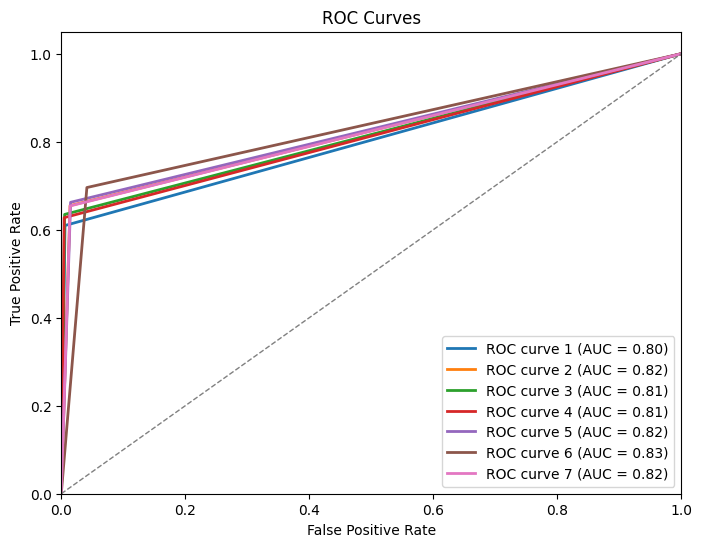

In [76]:
ros = RandomOverSampler(random_state=42)
sm = SMOTE(random_state=42)
enn = EditedNearestNeighbours()
tl = TomekLinks()

ada = ADASYN(random_state=42)

sme = SMOTEENN(random_state=42)
smt = SMOTETomek(random_state=42)

In [30]:
X = df_private_MTPL3.drop(columns=['Churn']) 
y = df_private_MTPL3['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_train, y_train, stratify=y_train, test_size=0.7, random_state=42)

In [34]:
from imblearn.ensemble import BalancedRandomForestClassifier

auc_scorer = make_scorer(roc_auc_score)

param_dist = {
    'n_estimators': randint(1, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

brf = BalancedRandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(brf, param_distributions=param_dist, n_iter=5, cv=5, scoring=auc_scorer, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters found:")
print(random_search.best_params_)

C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original pap

Best Parameters found:
{'bootstrap': True, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 55}


C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.9421879536729361
F1: 0.6813183556121996
AUC: 0.9609637485978946


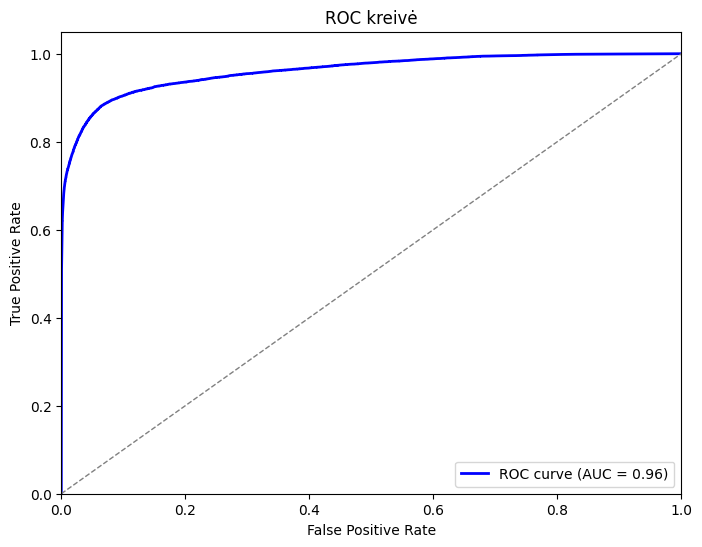

In [35]:

best_model = BalancedRandomForestClassifier(
    bootstrap=True,
    criterion='log_loss',
    max_depth=None,
    max_features=None,
    min_samples_leaf=3,
    min_samples_split=5,
    n_estimators=55,
    random_state=42
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1:", f1)

y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()


#Accuracy: 0.9494413437859578
#F1: 0.7030193923315015
#AUC: 0.9590399726224162

In [38]:

f1_scorer = make_scorer(f1_score)

param_dist = {
    'n_estimators': randint(1, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

brf = BalancedRandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(brf, param_distributions=param_dist, n_iter=5, cv=5, scoring=f1_scorer, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters found:")
print(random_search.best_params_)

C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original pap

Best Parameters found:
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 158}


C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.9494413437859578
F1: 0.7030193923315015


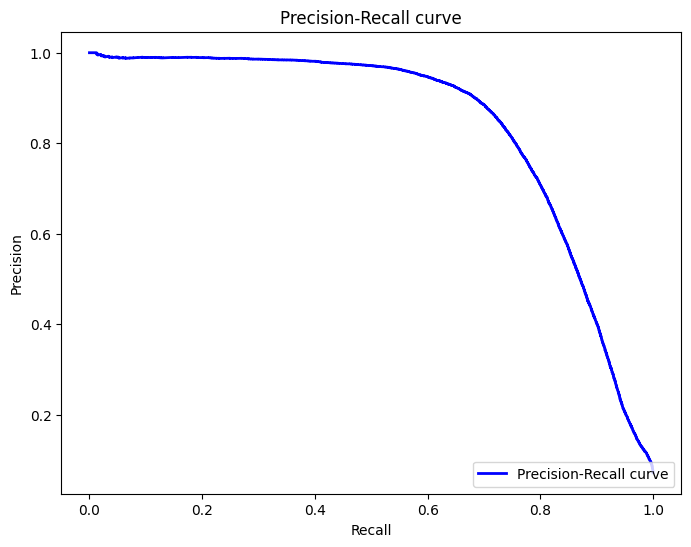

Precision: 0.6061984258830578
Recall: 0.8366472467581282
F1 Score: 0.7030193923315015


In [39]:



best_model = BalancedRandomForestClassifier(
    bootstrap=False,
    criterion='log_loss',
    max_depth=60,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=9,
    n_estimators=158,
    random_state=42
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1:", f1)

y_prob = best_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='lower right')
plt.show()

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


#Accuracy: 0.9494413437859578
#F1: 0.7030193923315015
#AUC: 0.9590399726224162

In [41]:

from sklearn.metrics import fbeta_score

fone_scorer = make_scorer(fbeta_score,
                          beta=2,
                          greater_is_better = True,
                          pos_label=0)

param_dist = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

brf = BalancedRandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(brf, param_distributions=param_dist, n_iter=5, cv=5, scoring=fone_scorer, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters found:")
print(random_search.best_params_)

C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to

KeyboardInterrupt: 

In [8]:
ros = RandomOverSampler(random_state=42)
sm = SMOTE(random_state=42)
enn = EditedNearestNeighbours()
tl = TomekLinks()

ada = ADASYN(random_state=42)

sme = SMOTEENN(random_state=42)
smt = SMOTETomek(random_state=42)




In [ ]:
subset_percentage = 0.1  # For example, use 10% of the data

# Determine the number of samples in the subset
subset_size = int(len(X) * subset_percentage)

# Randomly select indices for the subset
subset_indices = np.random.choice(len(X), size=subset_size, replace=False)